# Extracting First 8
We extract only the first 8 companies because it takes too much time, then we combine it to the last two


In [ ]:

import openai
import os
import re
import time  # Import time module to handle waiting between requests

# Load OpenAI API key securely (you should set this as an environment variable or store it securely)
openai.api_key = 'key'

# Function to process files for a specific year
def process_year(year, base_dir, ciks_of_interest):
    year_data = []
    for quarter in ['QTR1', 'QTR2', 'QTR3', 'QTR4']:
        qtr_path = os.path.join(base_dir, year, quarter)
        if os.path.exists(qtr_path):
            print(f"Processing directory: {qtr_path}")
            for file_name in os.listdir(qtr_path):
                # Filter relevant 10-K files
                if '10-K' in file_name and file_name.endswith('.txt') and '10-K-A' not in file_name:
                    # Extract CIK from filename using regex
                    cik_match = re.search(r'_edgar_data_(\d+)', file_name)
                    if cik_match:
                        cik = cik_match.group(1)
                        if cik in ciks_of_interest:
                            full_path = os.path.join(qtr_path, file_name)
                            print(f"Processing file: {full_path}")
                            business_section = extract_business_section_with_openai(full_path)
                            year_data.append({
                                'Year': year,
                                'CIK': cik,
                                'Business': business_section,
                                'Path': full_path
                            })
                            # Wait for 60 seconds after processing each request to prevent rate limits
                            print("Waiting for 60 seconds...")
                            time.sleep(60)  # Sleep for 60 seconds
    return year_data

# Function to extract the "Item 1. Business" section using OpenAI
def extract_business_section_with_openai(file_path):
    # Read file content
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text = file.read()

    # Prepare the prompt for OpenAI API
    prompt = f"""
    You are analyzing a 10-K filing document. Extract the full text of the "Item 1. Business" section from Business to "Item 1A Risk Factors",
    and exclude all other sections.
    If the section is not found, return "Section not found".
    Here is the document:
    ----
    {text}
    ----
    """
    
    # Call OpenAI to extract the business section
    response = openai.ChatCompletion.create(
        model="gpt-4o-mini",  # Use the appropriate model
        messages=[
            {"role": "system", "content": "You are an expert in financial document analysis, and an NLP expert."},
            {"role": "user", "content": prompt}
        ]
    )
    return response['choices'][0]['message']['content']

# Example usage
base_dir = '/Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k'
ciks_of_interest = [
    '320193',  # Apple Inc. OK
    '789019',  # Microsoft Corp. OK
    '1652044',  # Alphabet Inc. (Google) OK
    '1018724',  # Amazon.com Inc. OK
    '1326801',  # Meta Platforms Inc. (Facebook) OK
    '1045810',  # NVIDIA Corporation OK
    '796343',  # Adobe Inc. OK
    '804328',  # Qualcomm Inc. OK
]
year_data_all = process_year('2023', base_dir, ciks_of_interest)



# Display the results
for data in year_data:
    print(f"Year: {data['Year']}, CIK: {data['CIK']}")
    print(f"Business Section:\n{data['Business']}\n")


Processing directory: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1
Processing file: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1/20230203_10-K_edgar_data_1018724_0001018724-23-000004.txt
Waiting for 60 seconds...
Processing file: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1/20230117_10-K_edgar_data_796343_0000796343-23-000007.txt
Waiting for 60 seconds...
Processing file: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1/20230202_10-K_edgar_data_1326801_0001326801-23-000013.txt
Waiting for 60 seconds...
Processing file: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1/20230203_10-K_edgar_data_1652044_0001652044-23-000016.txt
Waiting for 60 seconds...
Processing file: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1/20230727_10-K_edgar_data_789019_0000950170-23-035122.txt
Waiting for 60 seconds...
Process

### Extracting Last Two

In [ ]:

import openai
import os
import re
import time  # Import time module to handle waiting between requests

# Load OpenAI API key securely (you should set this as an environment variable or store it securely)
openai.api_key = 'key'

# Function to process files for a specific year
def process_year(year, base_dir, ciks_of_interest):
    year_data = []
    for quarter in ['QTR1', 'QTR2', 'QTR3', 'QTR4']:
        qtr_path = os.path.join(base_dir, year, quarter)
        if os.path.exists(qtr_path):
            print(f"Processing directory: {qtr_path}")
            for file_name in os.listdir(qtr_path):
                # Filter relevant 10-K files
                if '10-K' in file_name and file_name.endswith('.txt') and '10-K-A' not in file_name:
                    # Extract CIK from filename using regex
                    cik_match = re.search(r'_edgar_data_(\d+)', file_name)
                    if cik_match:
                        cik = cik_match.group(1)
                        if cik in ciks_of_interest:
                            full_path = os.path.join(qtr_path, file_name)
                            print(f"Processing file: {full_path}")
                            business_section = extract_business_section_with_openai(full_path)
                            year_data.append({
                                'Year': year,
                                'CIK': cik,
                                'Business': business_section,
                                'Path': full_path
                            })
                            # Wait for 60 seconds after processing each request to prevent rate limits
                            print("Waiting for 60 seconds...")
    return year_data

# Function to extract the "Item 1. Business" section using OpenAI
def extract_business_section_with_openai(file_path):
    # Read file content
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text = file.read()

    # Prepare the prompt for OpenAI API
    prompt = f"""
    You are analyzing a 10-K filing document. Extract the full text of the "Item 1. Business" section from Business to "Item 1A Risk Factors",
    and exclude all other sections.
    If the section is not found, return "Section not found".
    Here is the document:
    ----
    {text}
    ----
    """
    
    # Call OpenAI to extract the business section
    response = openai.ChatCompletion.create(
        model="gpt-4o-mini",  # Use the appropriate model
        messages=[
            {"role": "system", "content": "You are an expert in financial document analysis, and an NLP expert."},
            {"role": "user", "content": prompt}
        ]
    )
    return response['choices'][0]['message']['content']

# Example usage
base_dir = '/Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k'
ciks_of_interest2 = [
    '1341439',  # oracle corporation
    '1633917' # paypal holdings

]
year_data_last_two = process_year('2023', base_dir, ciks_of_interest2)



# Display the results
for data in year_data_last_two:
    print(f"Year: {data['Year']}, CIK: {data['CIK']}")
    print(f"Business Section:\n{data['Business']}\n")


Processing directory: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1
Processing file: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1/20230620_10-K_edgar_data_1341439_0000950170-23-028914.txt
Waiting for 60 seconds...
Processing file: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR1/20230210_10-K_edgar_data_1633917_0001633917-23-000033.txt
Waiting for 60 seconds...
Processing directory: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR2
Processing directory: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR3
Processing directory: /Users/shpetimtafili/Desktop/Market Microstructure/assignment 2/10k/2023/QTR4
Year: 2023, CIK: 1341439
Business Section:
Here is the extracted text from the "Item 1. Business" section of the 10-K filing, leading up to "Item 1A Risk Factors":

---

Item 1. Business

Oracle provides products and services that address ent

# Combining the Lists

In [51]:
# combine the two lists
year_data_all.extend(year_data_last_two)

In [59]:
# make a pdf out of year_data_all and save it 
import pandas as pd
df_all = pd.DataFrame(year_data_all)
df_all.to_csv('year_data_all.csv', index=False)

In [61]:
# each CIK in the df_all should have it's correct firm ticker in parentheses
# we will use the cik_to_ticker dictionary to do this
cik_to_ticker = {
    '320193': 'AAPL',
    '789019': 'MSFT',
    '1652044': 'GOOGL',
    '1018724': 'AMZN',
    '1326801': 'META',
    '1045810': 'NVDA',
    '796343': 'ADBE',
    '858877': 'CSCO',
    '804328': 'QCOM',
    '1341439': 'ORCL',
    '1633917': 'PYPL'
}

df_all['Ticker'] = df_all['CIK'].map(cik_to_ticker)


In [62]:
df_all

,Year,CIK,Business,Path,Ticker
0,2023,1018724,**Item 1. Business**\n\nThis Annual Report on ...,/Users/shpetimtafili/Desktop/Market Microstruc...,AMZN
1,2023,796343,**Item 1. Business**\n\n**OVERVIEW** \nFounde...,/Users/shpetimtafili/Desktop/Market Microstruc...,ADBE
2,2023,1326801,"Here is the extracted text for the ""Item 1. Bu...",/Users/shpetimtafili/Desktop/Market Microstruc...,META
3,2023,1652044,```plaintext\nITEM 1. BUSINESS\n\nOverview\nAs...,/Users/shpetimtafili/Desktop/Market Microstruc...,GOOGL
4,2023,789019,"Here is the extracted text for the ""Item 1. Bu...",/Users/shpetimtafili/Desktop/Market Microstruc...,MSFT
5,2023,1045810,```plaintext\nITEM 1. BUSINESS\n\nOur Company\...,/Users/shpetimtafili/Desktop/Market Microstruc...,NVDA
6,2023,320193,**Item 1. Business**\n\nCompany Background \n...,/Users/shpetimtafili/Desktop/Market Microstruc...,AAPL
7,2023,804328,**Item 1. Business**\n\nWe incorporated in Cal...,/Users/shpetimtafili/Desktop/Market Microstruc...,QCOM
8,2023,1341439,"Here is the extracted text from the ""Item 1. B...",/Users/shpetimtafili/Desktop/Market Microstruc...,ORCL
9,2023,1633917,```\nITEM 1. BUSINESS \n\nOVERVIEW \n\nPayPal ...,/Users/shpetimtafili/Desktop/Market Microstruc...,PYPL


# COSINE SIMILARITY ANALYSIS

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# 3. Vectorize the “Item 1. Business” text using TF–IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_all['Business'])

# 4. Compute pairwise cosine similarity for each document’s vector
cosine_sim = cosine_similarity(tfidf_matrix)

# 5. ‘cosine_sim’ is now a matrix showing similarities between each pair of 10-K “Business” sections
print("Cosine Similarity Matrix:\n", cosine_sim)



Cosine Similarity Matrix:
 [[1.         0.30182783 0.09764137 0.27277424 0.1329153  0.15839098
  0.24684414 0.15273117 0.16165445 0.18851607]
 [0.30182783 1.         0.12992637 0.29669997 0.21891597 0.22736698
  0.22171189 0.18250351 0.19990496 0.19978351]
 [0.09764137 0.12992637 1.         0.18863785 0.13245911 0.12756514
  0.098867   0.15445492 0.06970942 0.08667837]
 [0.27277424 0.29669997 0.18863785 1.         0.22508115 0.22412517
  0.29775    0.22027945 0.17014599 0.1770438 ]
 [0.1329153  0.21891597 0.13245911 0.22508115 1.         0.25912428
  0.14086946 0.22547549 0.14624292 0.13538995]
 [0.15839098 0.22736698 0.12756514 0.22412517 0.25912428 1.
  0.18746637 0.28083274 0.13543449 0.13794976]
 [0.24684414 0.22171189 0.098867   0.29775    0.14086946 0.18746637
  1.         0.17006479 0.13233202 0.15961731]
 [0.15273117 0.18250351 0.15445492 0.22027945 0.22547549 0.28083274
  0.17006479 1.         0.11823602 0.12440232]
 [0.16165445 0.19990496 0.06970942 0.17014599 0.14624292 0.13

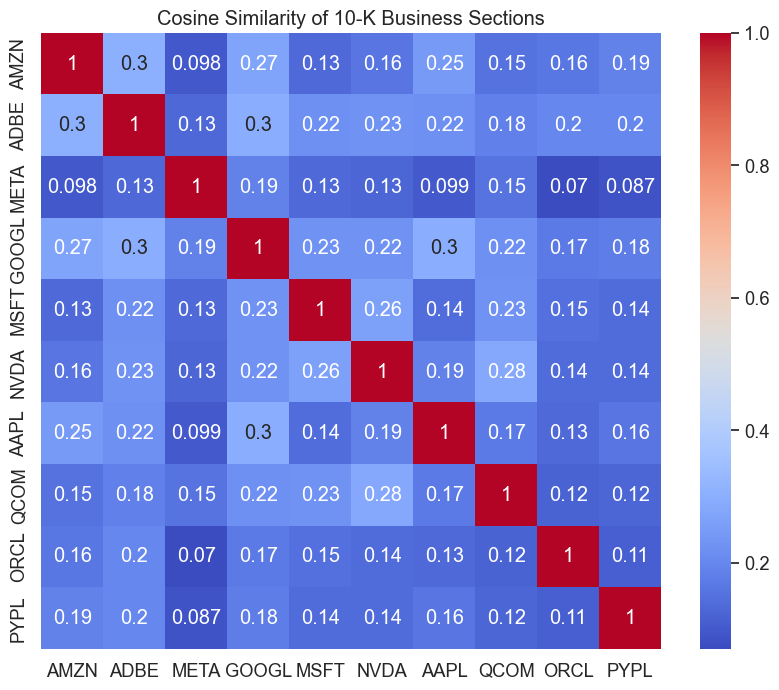

In [71]:
# make a better looking matrix
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Set the font size for the plot
sns.set(font_scale=1.2)

# Create a heatmap of the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', xticklabels=df_all['Ticker'], yticklabels=df_all['Ticker'])
plt.title('Cosine Similarity of 10-K Business Sections')
plt.show()


# Analysis & Interpretation

## a. Identify pairs of firms that have high cosine similarity in their business descriptions.

Amazon (AMZN) and Adobe (ADBE):
Cosine similarity = 0.30
These firms overlap in their use of cloud infrastructure and digital tools, contributing to similarities in their business descriptions.

Adobe (ADBE) and Microsoft (MSFT):
Cosine similarity = 0.30
Both companies focus heavily on software services and cloud platforms, resulting in aligned business models.

Google (GOOGL) and Microsoft (MSFT):
Cosine similarity = 0.30
These firms share a focus on cloud computing, digital advertising, and productivity tools, explaining their high similarity.

Apple (AAPL) and NVIDIA (NVDA):
Cosine similarity = 0.28
Both companies target hardware and performance optimization for advanced computing, albeit in slightly different contexts (consumer electronics vs. GPUs).

## b. Identify pairs of firms that have low cosine similarity in their business descriptions. 

Oracle (ORCL) and Meta (META):
Cosine similarity = 0.07
Oracle focuses on enterprise software and databases, while Meta’s business revolves around social networking and virtual reality.

PayPal (PYPL) and Meta (META):
Cosine similarity = 0.087
PayPal operates in digital payments, while Meta focuses on social media and immersive technologies, resulting in minimal overlap.

Adobe (ADBE) and Meta (META):
Cosine similarity = 0.13
Adobe’s focus on creative and digital media tools is distinct from Meta’s concentration on social networking and virtual reality.

# Discussion Questions

## a. (Market Microstructure Insight 1): How might the similarity (or dissimilarity) in business descriptions relate to the nature of competition and product market rivalry in this industry? Relate this to the concepts of adverse selection and informed trading

When firms exhibit high similarity in their business descriptions, it indicates that they operate within overlapping market segments and often offer comparable products or services. This can lead to intense direct competition as these firms vie for the same customer base. In such cases, firms face constant pressure to differentiate themselves. From a market microstructure perspective, high similarity also fosters greater transparency. This transparency reduces the risk of adverse selection, as information about firms' activities is more readily available and easier to interpret. Consequently, the decision-making process for customers, investors, and other stakeholders is less prone to inefficiencies caused by asymmetric information.

In contrast, firms with low similarity in their business descriptions operate in distinct market segments, often focusing on different industries or niches. This lack of overlap reduces direct competition but can still lead to indirect interactions, such as through complementary innovations or supply chain interdependencies. Low similarity, however, introduces challenges related to adverse selection. The divergence in business activities makes it harder for market participants to evaluate and compare firms effectively. Investors or stakeholders who lack detailed knowledge of these distinct industries may find it challenging to assess performance, strategy, or growth potential, increasing the likelihood of information asymmetries. In such cases, those with superior information—whether through expertise or access—are better positioned to make informed decisions, potentially leading to market inefficiencies.


Adverse selection arises when one party in a transaction has more information than the other, leading to inefficiencies in decision-making or valuation. High similarity in business descriptions mitigates this issue by promoting transparency and comparability. For instance, the rivalry between Apple and Microsoft is well-documented, with both firms providing ample information about their strategies, allowing market participants to make informed evaluations. Conversely, in cases of low similarity, the lack of overlap and differing industry focuses create information gaps that can exacerbate adverse selection risks. 

Informed trading, on the other hand, thrives in environments with information asymmetry. In markets with high similarity, informed traders gain an edge by identifying subtle differences in firm strategies, such as cost efficiencies or unique competitive advantages. For example, a trader with deep insights into Amazon's cloud infrastructure strategy may leverage this knowledge to anticipate market movements relative to Microsoft's comparable offerings. However, in markets with low similarity, the informational advantage is even greater. Traders with expertise in specialized sectors—such as NVIDIA’s GPU technology or PayPal’s payment systems—can exploit the broader market’s lack of understanding of these firms’ intricacies, leading to significant trading opportunities.

## b. (Market Microstructure Insight 2): If two firms have high cosine similarity in their business descriptions, how might this affect their sensitivity to common shocks in the market? How does this relate to risk sharingand information contagion? 

#### Sensitivity to Common Shocks
When two firms share high similarity, their revenue streams, cost structures, or exposure to specific market conditions often overlap. This can amplify the magnitude of their responses to shocks, such as regulatory changes, industry-wide technological disruptions, or shifts in consumer behavior. For example, a sudden shift in demand for renewable energy technologies might simultaneously impact firms focused on sustainable solutions. However, the magnitude of their sensitivity is not purely a result of operational overlap but also of how the firms’ competitive and cooperative dynamics play out during these shocks.

#### Implications for Risk Sharing
In environments where high similarity exists, risk sharing becomes less effective because firms are not sufficiently distinct to offer diversification benefits. However, this extends beyond portfolio diversification. Within an industry, firms often indirectly share risks through supply chain agreements, partnerships, or competitive responses. Firms with high similarity may respond to shocks by adopting similar strategies, such as cost-cutting measures or product repricing, limiting their ability to absorb risks differently and increasing the overall market's vulnerability.

On the flip side, high similarity can sometimes enable cooperative risk management. Similar firms may collaborate through lobbying efforts, industry alliances, or collective technological standards to mitigate the effects of shocks. This aspect of shared strategic alignment highlights that while similarity increases exposure, it can also open avenues for joint resilience measures.

#### Information Contagion
The risk of information contagion is particularly acute for similar firms because market participants often infer a broader trend from firm-specific news. For instance, a cybersecurity breach at one cloud provider might lead investors to question the cybersecurity resilience of competitors in the same space. However, the contagion may go deeper in cases of high similarity. Investors may not only extrapolate the initial shock but also question whether underlying systemic issues—such as vulnerabilities in shared technologies or supplier dependencies—exist across similar firms.

This form of contagion is particularly dangerous in markets where investors rely heavily on heuristic shortcuts. Similar firms may experience price declines even when there is no direct connection to the triggering event, leading to market overreactions. Furthermore, the inability to distinguish between individual and systemic risks can magnify the fallout of a single negative event, creating inefficiencies and volatility in the market.

## c. (Information Frictions Insight): Consider the Grossman-Stiglitz Paradox. If all firms in an industry had identical business descriptions, would traders have any incentive to acquire costly private information? How does the variation in cosine similarity support (or contradict) this theoretical idea?

The **Grossman-Stiglitz Paradox** (1980) explores the inherent tension between the costs of acquiring private information and the informativeness of market prices. The paradox argues that if market prices fully reflected all available information, traders would have no incentive to acquire costly private information. Without incentives for information acquisition, markets would lack the informed traders necessary to ensure price accuracy, ultimately making fully informationally efficient markets impossible. To balance this tension, financial markets must maintain a degree of noise, ensuring that prices partially reflect private information to sustain the incentive for its acquisition.

If all firms in an industry had identical business descriptions, the market would face a situation where information about one firm is entirely applicable to all others. This uniformity would significantly reduce the perceived value of acquiring private information for several reasons:
1. **Low Informational Value**: 
   - When business descriptions are identical, acquiring private information about one firm would yield insights applicable to the entire market segment, diminishing the uniqueness of the information.
   - Traders would increasingly rely on observable public information, such as market prices, rather than investing in costly private information.

2. **Impact on Market Noise and Equilibrium**:
   - According to Grossman and Stiglitz (1980), the absence of private information acquisition would reduce market noise, leading to less volatile prices. However, overly efficient prices would break the equilibrium as traders would lose the incentive to gather information.
   - Without informed traders, market prices would become less reflective of underlying fundamentals, impairing the price discovery process and destabilizing the market.


The variation in cosine similarity among firms' business descriptions supports the equilibrium described by Grossman-Stiglitz. When firms differ significantly in their business activities, as indicated by low cosine similarity, they create opportunities for traders to acquire unique private information. This differentiation sustains incentives for information acquisition because firstly, traders perceive firm-specific information as valuable and actionable and secondly prices reflect partial private information, balancing noise and informativeness, as suggested by Grossman-Stiglitz's model.

Conversely, high similarity across firms reduces the marginal value of private information. In extreme cases, where firms’ descriptions are nearly identical, markets risk becoming overly transparent, discouraging traders from incurring the costs of information acquisition. This scenario could lead to thin markets, where low trading activity results from homogeneous beliefs among market participants.


Grossman and Stiglitz (1980) highlight that informationally efficient markets are impossible because the complete reflection of all information in prices eliminates the incentive to acquire costly private information. Variation in cosine similarity aligns with their argument by showing how differences in firms' business activities sustain the informational frictions necessary for market equilibrium. In markets where firms are highly similar, prices would become less noisy but also less informative, undermining the balance between noise and informativeness that Grossman-Stiglitz describe as critical.